## Домашнее задание урока 7.

#### Задание 1. 
К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [2]:
def euclidian_metric(vec1, vec2):
#     metrics = 0
#     for num, _ in enumerate(vec1):
#         metrics += (vec1[num] - vec2[num]) ** 2
#     return np.sqrt(metrics)
    
    metrics = [(v - vec2[n]) ** 2 for n, v in enumerate(vec1)]
    return np.sqrt(sum(metrics))

In [3]:
def knn_algorithm(x_train, y_train, x_test, k, weighted=True):
    answ = []
    for x in x_test:
        dist = []
        for n, v in enumerate(x_train):
            dist.append((euclidian_metric(x, v), y_train[n]))
        k_neighbours = sorted(dist)[0:k]
        classes = {label: 0 for label in set(y_train)}
        for num, val in enumerate(k_neighbours):
            if weighted == True:
                # w_ = 1 / (num + 1)
                w_ = .1 ** val[0]
            else:
                w_ = 1
            classes[val[1]] += w_
        answ.append(sorted(classes, key=classes.get)[-1])
    return answ

In [4]:
def accuracy_knn(pred, orig):
    return print(f"Accuracy_kNN_algorithm:={sum(pred == orig) / len(pred):.4f}")

In [5]:
pred = knn_algorithm(X_train, y_train, X_test, k=5)
accuracy_knn(pred, y_test)
np.array(pred)

Accuracy_kNN_algorithm:=1.0000


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

#### Задание 2. (\*) 
Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

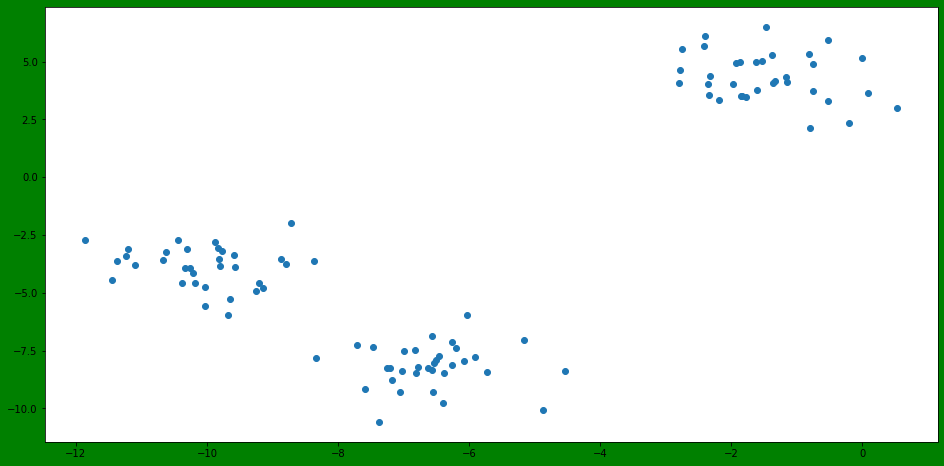

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, random_state=1)

plt.figure(facecolor="g", figsize=(16,8))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
def kmeans_algorithm(data, k, max_iterations, min_distance):
    random.seed(29)
    # выберем наугад 6 точек данных в качестве центроидов
    # centroids = data[random.sample(range(len(data)), k=k)]
    centroids = [data[i] for i in range(k)]
    
    for iteration in range(max_iterations):
        label_dict = {i: [] for i in range(k)}
        for x in data:
            dist = [euclidian_metric(x, centroid) for centroid in centroids]
            label_dict[dist.index(min(dist))].append(x)
        prev_centroids = centroids.copy()
        for n, _ in enumerate(centroids):
            centroids[n] = np.mean(label_dict[n], axis=0)
        stop_flag = True
        for i in range(k):
            dist = euclidian_metric(prev_centroids[i], centroids[i])
            if dist > min_distance:
                stop_flag = False
        # print(f"iteration #{iteration}")
        if stop_flag:
            print("Stop. iteratins_num is: ", iteration)
            break
    return prev_centroids, label_dict

In [8]:
# _, label_dict = kmeans_algorithm(X, 3, 10, 10)
# label_dict = [list(elem) for elem in label_dict[1]]
# label_dict, _

centroids, label_dict = kmeans_algorithm(X, 3, 4, 1e-4)

Stop. iteratins_num is:  3


In [9]:
def euclidian_ms(vec1, vec2):
    ms = [(v - vec2[n]) ** 2 for n, v in enumerate(vec1)]
    return sum(ms)

def ms_cluster_cohesion(centroids, label_dict):
    sum_ms_cluster_coh = []
    for cluster in label_dict:
        cluster_cohesion = 0
        for obj in label_dict[cluster]:
            cluster_cohesion += euclidian_ms(obj, centroids[cluster])
        cluster_cohesion /= len(label_dict[cluster])
        sum_ms_cluster_coh.append(cluster_cohesion)
    return sum(sum_ms_cluster_coh)

In [10]:
ms_cluster_cohesion(centroids, label_dict)
# Функция работает корректно. Проверено.

4.6822162587384675

Stop. iteratins_num is:  1
Stop. iteratins_num is:  1
Stop. iteratins_num is:  3
Stop. iteratins_num is:  3
Stop. iteratins_num is:  3
Stop. iteratins_num is:  3
Stop. iteratins_num is:  3
Stop. iteratins_num is:  4
Stop. iteratins_num is:  4
Stop. iteratins_num is:  7


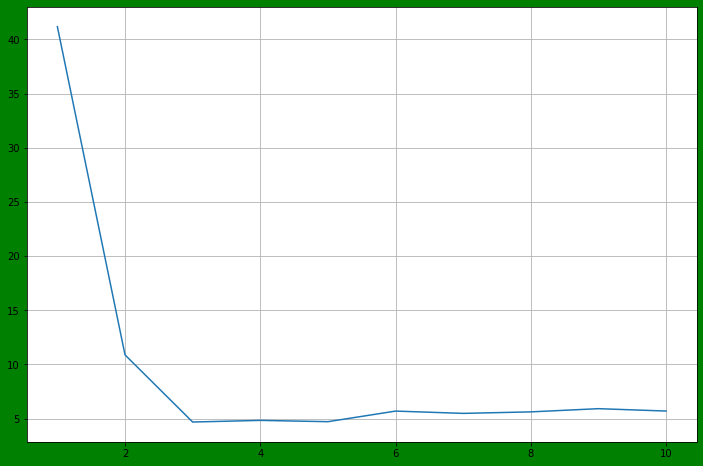

In [11]:
ms_cluster_coh_metric = []
for clusters in range(1, 11):
    centroids, label_dict = kmeans_algorithm(X, clusters, 10, 1e-4)
    ms_cluster_coh_metric.append(ms_cluster_cohesion(centroids, label_dict))

plt.figure(figsize=(12,8), facecolor="g")
plt.plot(range(1, 11), ms_cluster_coh_metric)
plt.grid()
plt.show()

Видно что график среднеквадратичного внутрикластерного расстояния "ложится" на ассимптому после количества кластеров = 3; Т.е. оптимальное количество кластеров (`k`) для этой модели равно трем ($k=3$).